# MSAIL Tutorial Series

## MNIST Mini-Project

So far we have covered 4 supervised [classfication](https://github.com/MSAIL/Curriculum/blob/master/classification.ipynb) algorithms:
* Logistic Regression
* Support Vector Machines (SVM)
* k Nearest Neighbors (kNN)
* Naive Bayes

Now let us apply these to a larger dataset, namely [MNIST](http://yann.lecun.com/exdb/mnist/). In the process we will observe how we can adapt these algorithms for multi-class rather than binary classification.

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original', data_home='/Users/nanddalal/tmp/')

x = mnist.data
y = mnist.target
xy = np.c_[x,y]
np.random.shuffle(xy)

train_x = xy[0:1000, 0:784]
train_y = xy[0:1000, -1]
test_x = xy[1000:1100, 0:784]
test_y = xy[1000:1100, -1]

In [3]:
def train_and_test(model, xtrain, ytrain, xtest, ytest):
    model = model.fit(xtrain, ytrain)
    output = model.predict(xtest)
    print (1.0 * sum([i==j for (i, j) in zip(output, ytest)])) / len(ytest)

1.0


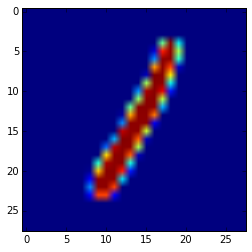

In [4]:
plt.imshow(train_x[0].reshape(28, 28))
print train_y[0]

### k Nearest Neighbors (kNN)

In [6]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsClassifier(3, weights='distance')
train_and_test(model, train_x, train_y, test_x, test_y)

0.91


### Naive Bayes

In [7]:
import sklearn.naive_bayes
model = sklearn.naive_bayes.MultinomialNB()
train_and_test(model, train_x, train_y, test_x, test_y)

0.81


### Logistic Regression -> Softmax Regression

In [8]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression()
train_and_test(model, train_x, train_y, test_x, test_y)

0.83


### Support Vector Machines (SVM)

In [9]:
import sklearn.svm
model = sklearn.svm.LinearSVC()
train_and_test(model, train_x, train_y, test_x, test_y)
model = sklearn.svm.SVC(kernel="rbf")
train_and_test(model, train_x, train_y, test_x, test_y)

0.82
0.08


### Neural Networks

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg" height="200" width="200">

Let us quickly review [logistic regression](https://github.com/MSAIL/Curriculum/blob/master/classification.ipynb). Now we can think about neural networks as running several logistic regressions at the same time.

In [10]:
train_y_probs = np.zeros((1000, 10))
for i in range(1000):
    train_y_probs[i][int(train_y[i])] = 1.0

In [12]:
class NeuralNetwork:
    
    def __init__(self):
        self.weights = np.random.randn(784,10)
        self.biases = np.random.randn(10)
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        out = e_x / e_x.sum()
        return out

    def fit(self, train_x, train_y):        
        for it in range(100):
            if it % 100 == 0:
                print "Epoch", it

            for i in range(1000):
                input_layer = train_x[i]
                hidden_layer = np.dot(input_layer, self.weights) + self.biases
                output_layer = self.softmax(hidden_layer)

                grad = output_layer - train_y[i]

                w_grad_hid = np.dot(input_layer.reshape(784,1), grad.reshape(1,10))
                b_grad_hid = w_grad_hid.sum(axis=0)

                self.weights -= w_grad_hid
                self.biases -= b_grad_hid
        
        return self

    def predict(self, test_x):
        preds = np.zeros(100)
        for i in range(100):
            pred = self.softmax(np.dot(test_x[i], self.weights) + self.biases)
            preds[i] = np.argmax(pred)
        return preds
    
    def visualize(self):
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.axis('off')
            plt.set_cmap('gray')
            plt.imshow(model.weights[:,i].reshape(28, 28))

In [13]:
model = NeuralNetwork()
train_and_test(model, train_x, train_y_probs, test_x, test_y)

Epoch 0
0.92


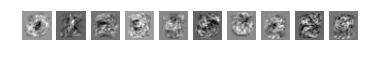

In [14]:
model.visualize()